## Question 1 - Delivery_time -> Predict delivery time using sorting time

#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

File : delivery_time.csv

In [51]:
# import the libraries
import pandas as pd 
import numpy as np
from scipy import stats

#### Importing data from file delivery_time.csv

In [52]:
# Reading the data from the file 'Q9_a.csv'
q1_data = pd.read_csv("delivery_time.csv")

#### EDA (Exploratory Data Analysis)

In [53]:
q1_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#### Checking for Null Values

In [54]:
# Checking to see if there are any null values
# We can get this information using q1_data.info() option as well
q1_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [55]:
# Data Structure
print(type(q1_data))
print(q1_data.shape)

<class 'pandas.core.frame.DataFrame'>
(21, 2)


In [56]:
# data types
q1_data.dtypes # check data types of all variables

Delivery Time    float64
Sorting Time       int64
dtype: object

#### Checking for Duplicates

In [57]:
# Checking for Duplicate Values
q1_data.duplicated()  # if any 2 rows has same values

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [58]:
# Count of duplicated rows
q1_data[q1_data.duplicated()].shape

(0, 2)

In [59]:
# Print the duplicated rows. Since we don't have any duplicates it will not show anything
q1_data[q1_data.duplicated()]

,Delivery Time,Sorting Time


#### Rename Columns

In [60]:
# Renaming 'Delivery Time' to 'Delivery_Time' and 'Sorting Time' to 'Sorting_Time', removing the space in between
q1_data.rename(columns = {'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, inplace = True)
q1_data.head

<bound method NDFrame.head of     Delivery_Time  Sorting_Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

#### Outlier Detection

Plotting q1_data and checking for outliers

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Delivery_Time')

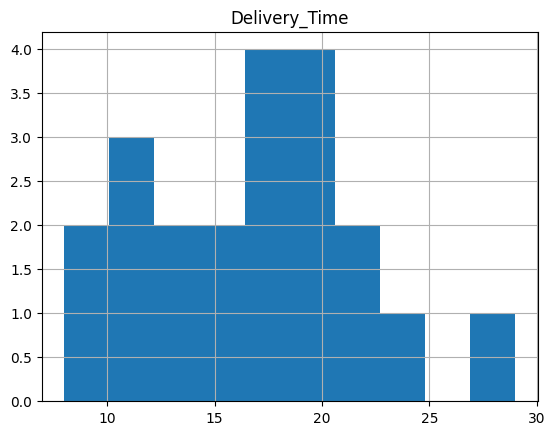

In [117]:
# histogram of 'Delivery_Time'
q1_data['Delivery_Time'].hist()
plt.title('Delivery_Time')

Text(0.5, 1.0, 'Sorting_Time')

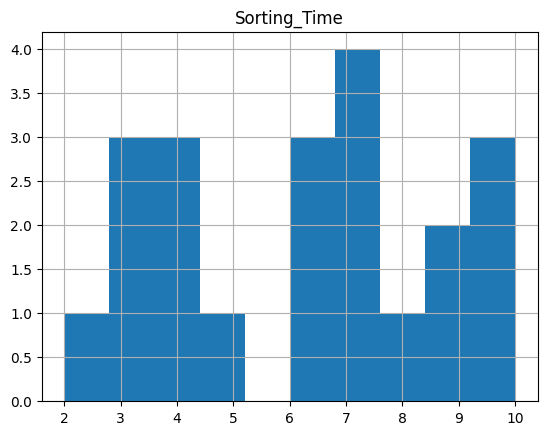

In [118]:
# histogram of 'Delivery_Time'
q1_data['Sorting_Time'].hist()
plt.title('Sorting_Time')

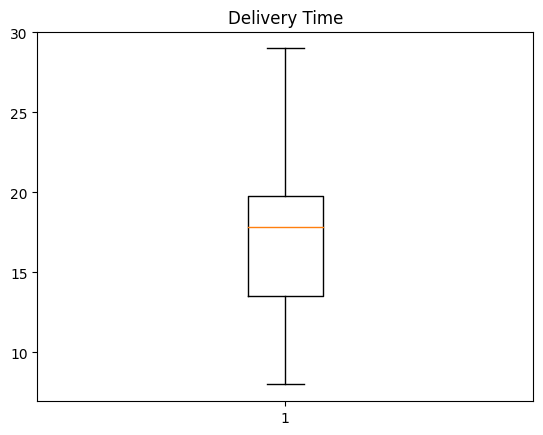

In [64]:
# Based on the chart, we can see that there are no outliers for 'Delivery_Time'
Box_Plot_DT = plt.boxplot(q1_data['Delivery_Time'])
plt.title('Delivery Time')
plt.show()

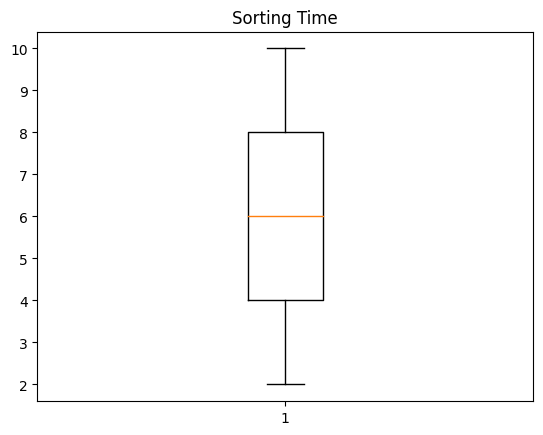

In [65]:
# Based on the chart, we can see that there are no outliers for 'Sorting_Time'
Box_Plot_ST = plt.boxplot(q1_data['Sorting_Time'])
plt.title('Sorting Time')
plt.show()

In [66]:
Box_Plot_DT
# The 'fliers' parameter has details about the outliers, here the 2 arrays are empty confirming no outliers in x as well as y axis
[item.get_data() for item in Box_Plot_DT['fliers']]

[(array([], dtype=float64), array([], dtype=float64))]

In [67]:
Box_Plot_ST
# The 'fliers' parameter has details about the outliers, here the 2 arrays are empty confirming no outliers in x as well as y axis
[item.get_data() for item in Box_Plot_ST['fliers']]

[(array([], dtype=float64), array([], dtype=int64))]

In [68]:
# Descriptive stats
q1_data['Delivery_Time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery_Time, dtype: float64

In [69]:
# Descriptive stats
q1_data['Sorting_Time'].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting_Time, dtype: float64

In [70]:
# Bar plot - to identify outliers in categorical data - get count of unique values
q1_data['Delivery_Time'].value_counts()

Delivery_Time
21.00    1
10.75    1
17.83    1
8.00     1
18.11    1
13.75    1
14.88    1
12.03    1
11.50    1
16.68    1
19.83    1
13.50    1
18.75    1
17.90    1
9.50     1
19.00    1
15.35    1
29.00    1
24.00    1
19.75    1
21.50    1
Name: count, dtype: int64

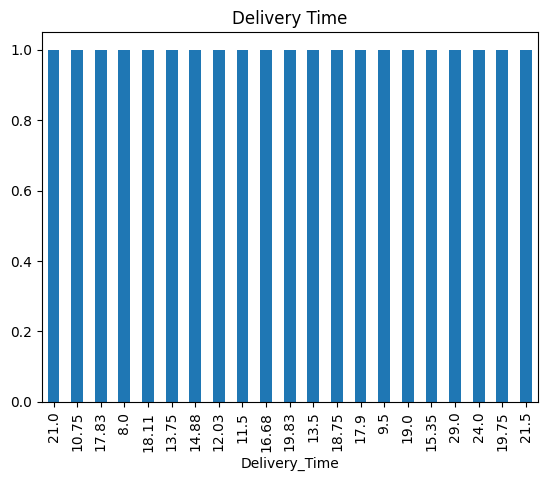

In [127]:
#Bar plot - to identify outliers in categorical data
q1_data['Delivery_Time'].value_counts().plot.bar()
plt.title('Delivery Time')
plt.show()

In [124]:
#Bar plot - to identify outliers in categorical data - get count of unique values
q1_data['Sorting_Time'].value_counts()

Sorting_Time
7     4
10    3
4     3
6     3
3     3
9     2
8     1
2     1
5     1
Name: count, dtype: int64

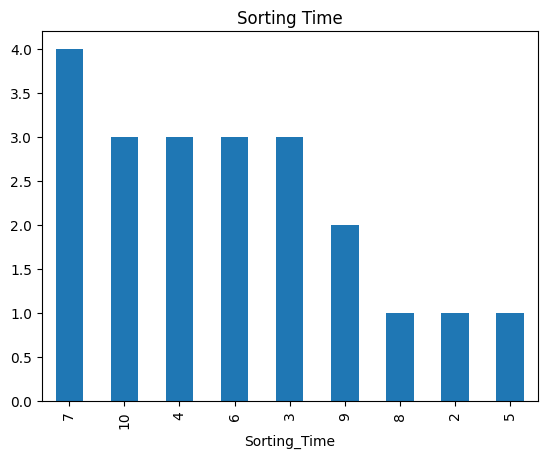

In [126]:
#Bar plot - to identify outliers in categorical data
q1_data['Sorting_Time'].value_counts().plot.bar()
plt.title('Sorting Time')
plt.show()

#### Scatter Plot and Correlation Analysis

c:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


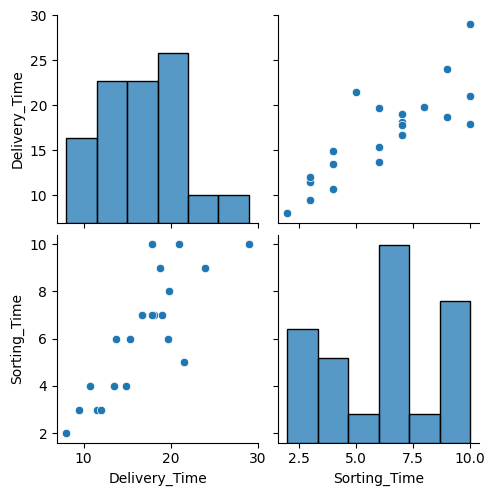

In [74]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
#pd.plotting.scatter_matrix(q1_data)
sns.pairplot(q1_data) # diagonal - histogram, other - scatter plot

In [75]:
q1_data.corr()
# The table shows that there is a "good" correlation between both these columns i.e. 0.825997 or 83% (approx.)

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

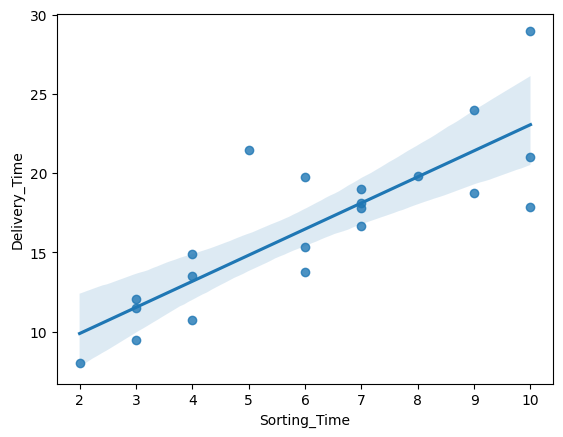

In [76]:
# Visualizing the correlation between x and y i.e., 'Sorting_Time' and 'Delivery_Time'
sns.regplot(x="Sorting_Time",y="Delivery_Time", data = q1_data)
# The visualization also shows that there is a "good" correlation between both these columns similar to the matrix shown earlier.

C:\Users\Office\AppData\Local\Temp\ipykernel_11124\3443045476.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(q1_data['Sorting_Time'])


<Axes: xlabel='Sorting_Time', ylabel='Density'>

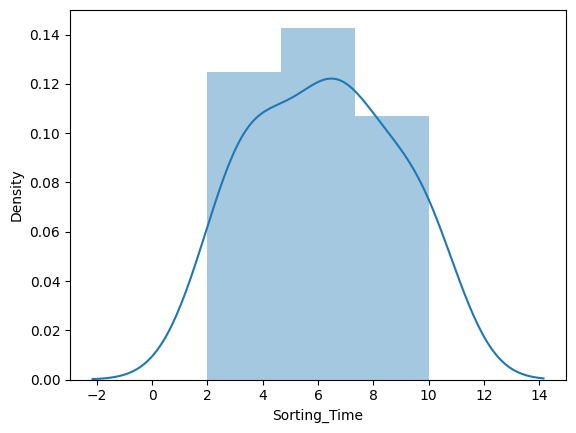

In [77]:
import seaborn as sns
sns.distplot(q1_data['Sorting_Time'])

C:\Users\Office\AppData\Local\Temp\ipykernel_11124\1162970599.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(q1_data['Delivery_Time'])


<Axes: xlabel='Delivery_Time', ylabel='Density'>

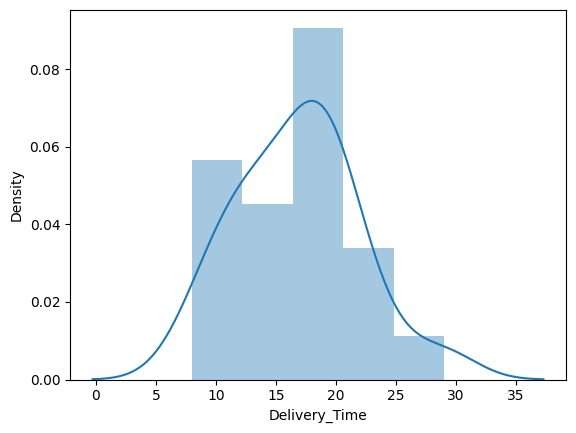

In [78]:
import seaborn as sns
sns.distplot(q1_data['Delivery_Time'])

##### Fitting a Linear Regression Model

In [79]:
# Fitting a Linear Regression Model
import statsmodels.formula.api as smf    # model_Regression model, "Y~X", or "Dependent_Variable ~ Independent_Variable"

model = smf.ols("Delivery_Time~Sorting_Time", data=q1_data).fit()

# Ordinary Least Squares, y Dependent Variable = "Delivery_Time", then give ~ symbol and then x Independent variable - "Sorting_Time" 
# Dataset - q1_data, fit() - the fit function for the regression line

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        19:43:52   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Coefficient are B0 (as Intercept in params) and B1 (as Sorting_Time in params)


model.params


# Reg. Equ: Delivery_Time = B0 + B1 * Sorting_Time
# In output: Intercept - B0, Sorting_Time - Coefficient of Sorting_Time i.e. B1
# Delivery_Time = 6.582734 + 1.649020 * Sorting_Time

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [82]:
# Lets suppose Sorting_Time is 9 then predicting the Delivery_Time

Delivery_Time = 6.582734 + 1.649020 * 11
Delivery_Time

24.721953999999997

In [83]:
# R squared values
(model.rsquared, model.rsquared_adj)
# Since rsquared value is 68.2% it is an OK equation with - 0.65 < r**2 < 0.75

(0.6822714748417231, 0.6655489208860244)

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

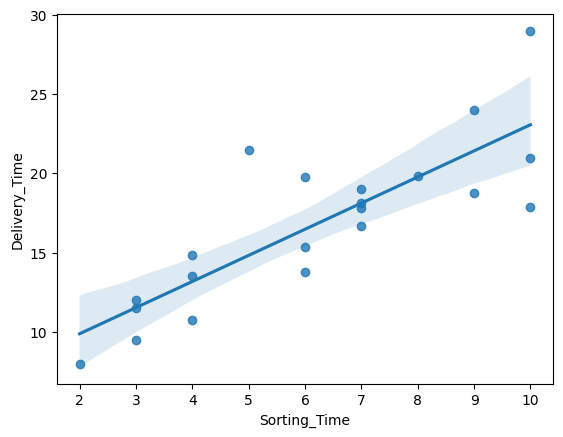

In [84]:
sns.regplot(x="Sorting_Time",y="Delivery_Time", data = q1_data)

In [85]:
# t and p-values
print(model.tvalues,'\n', model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


#### Adding a new Predicted_Delivery Column

In [86]:
# Predict for new data
sortdata = q1_data['Sorting_Time']
sortdata

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting_Time, dtype: int64

In [87]:
q1_data['Predicted_Delivery'] = model.predict(sortdata) # model-regression model

In [90]:
q1_data

,Delivery_Time,Sorting_Time,Predicted_Delivery
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


##### Predict for New Data Point

In [89]:
# Predict for new data
newdata = pd.Series([1,11,8.5,7.5,3,8,12])

In [27]:
newdata

0     1.0
1    11.0
2     8.5
3     7.5
4     3.0
5     8.0
6    12.0
dtype: float64

In [28]:
data_pred = pd.DataFrame(newdata,columns=['Sorting_Time'])

In [29]:
data_pred

,Sorting_Time
0,1.0
1,11.0
2,8.5
3,7.5
4,3.0
5,8.0
6,12.0


In [30]:
model.predict(data_pred) # model-regression model

0     8.231754
1    24.721953
2    20.599403
3    18.950383
4    11.529794
5    19.774893
6    26.370973
dtype: float64

## Question 2 - Salary_hike -> Build a prediction model for Salary_hike

#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

File : Salary_Data.csv

In [174]:
#import the libraries
import pandas as pd 
import numpy as np
from scipy import stats

#### Importing data from file delivery_time.csv

In [175]:
# Reading the data from the file 'Q9_a.csv'
q2_data = pd.read_csv("Salary_Data.csv")
q2_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### EDA (Exploratory Data Analysis)

In [176]:
q2_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Checking for Null Values

In [177]:
# Checking to see if there are any null values
# We can get this information using q2_data.info() option as well
q2_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [178]:
# Data Structure
print(type(q2_data))
print(q2_data.shape)

<class 'pandas.core.frame.DataFrame'>
(30, 2)


In [179]:
# data types
q2_data.dtypes # check data types of all variables

YearsExperience    float64
Salary             float64
dtype: object

#### Checking for Duplicates

In [180]:
# Checking for Duplicate Values
q2_data.duplicated()  # if any 2 rows has same values

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [181]:
# Count of duplicated rows
q2_data[q2_data.duplicated()].shape

(0, 2)

In [182]:
# Print the duplicated rows. Since we don't have any duplicates it will not show anything
q2_data[q2_data.duplicated()]

,YearsExperience,Salary


#### Rename Columns

In [183]:
# Renaming 'YearsExperience' to 'Experience_In_Years'
q2_data.rename(columns = {'YearsExperience':'Experience_In_Years'}, inplace = True)
q2_data.head()

,Experience_In_Years,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Outlier Detection

Plotting q2_data and checking for outliers

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Salary')

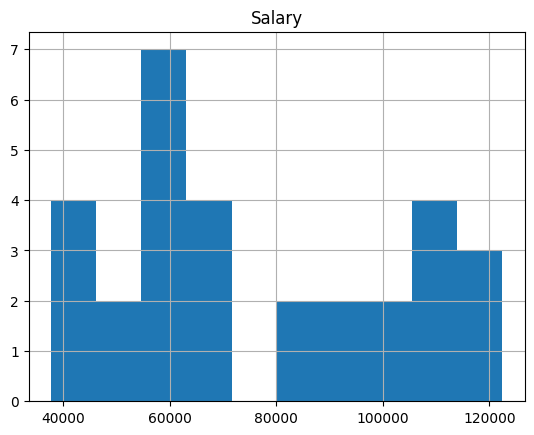

In [185]:
# histogram of 'Delivery_Time'
q2_data['Salary'].hist()
plt.title('Salary')

Text(0.5, 1.0, 'Experience In Years')

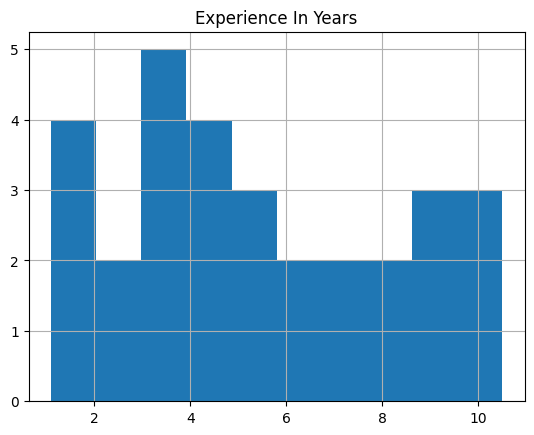

In [186]:
# histogram of 'Experience_In_Years'
q2_data['Experience_In_Years'].hist()
plt.title('Experience In Years')

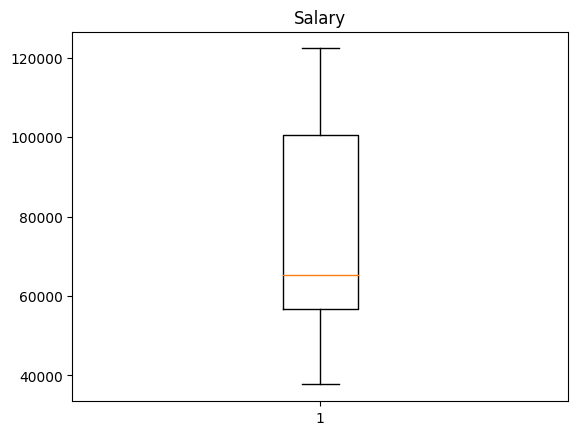

In [187]:
# Based on the chart, we can see that there are no outliers for 'Salary'
Box_Plot_Sal = plt.boxplot(q2_data['Salary'])
plt.title('Salary')
plt.show()

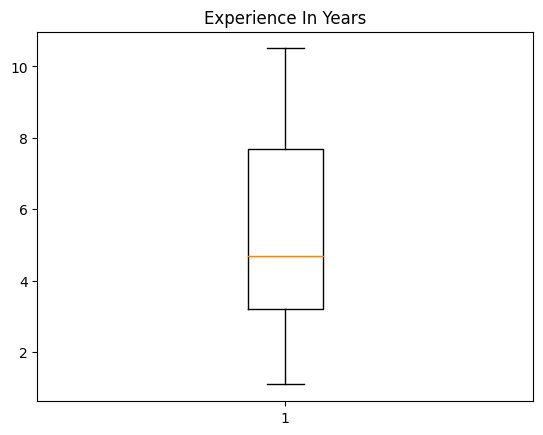

In [188]:
# Based on the chart, we can see that there are no outliers for 'Experience_In_Years'
Box_Plot_Exp = plt.boxplot(q2_data['Experience_In_Years'])
plt.title('Experience In Years')
plt.show()

In [189]:
Box_Plot_Sal
# The 'fliers' parameter has details about the outliers, here the 2 arrays are empty confirming no outliers in x as well as y axis
[item.get_data() for item in Box_Plot_Sal['fliers']]

[(array([], dtype=float64), array([], dtype=float64))]

In [190]:
Box_Plot_Exp
# The 'fliers' parameter has details about the outliers, here the 2 arrays are empty confirming no outliers in x as well as y axis
[item.get_data() for item in Box_Plot_Exp['fliers']]

[(array([], dtype=float64), array([], dtype=float64))]

In [191]:
# Descriptive stats
q2_data['Salary'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

In [192]:
# Descriptive stats
q2_data['Experience_In_Years'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: Experience_In_Years, dtype: float64

In [193]:
# Bar plot - to identify outliers in categorical data - get count of unique values
q2_data['Salary'].value_counts()

Salary
39343.0     1
46205.0     1
122391.0    1
112635.0    1
116969.0    1
105582.0    1
109431.0    1
113812.0    1
101302.0    1
98273.0     1
91738.0     1
93940.0     1
81363.0     1
83088.0     1
66029.0     1
67938.0     1
61111.0     1
57081.0     1
56957.0     1
55794.0     1
63218.0     1
57189.0     1
64445.0     1
54445.0     1
60150.0     1
56642.0     1
39891.0     1
43525.0     1
37731.0     1
121872.0    1
Name: count, dtype: int64

<Axes: xlabel='Salary'>

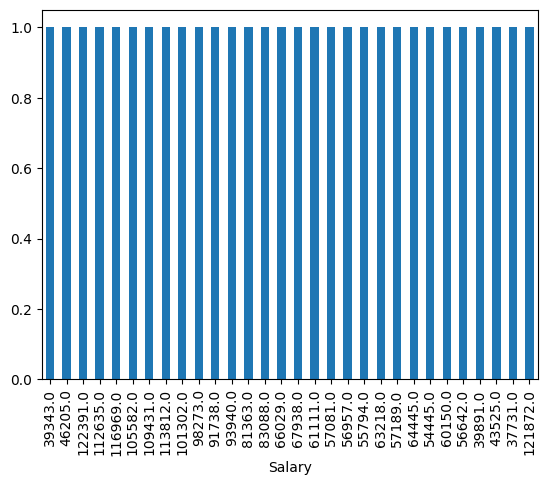

In [194]:
#Bar plot - to identify outliers in categorical data
q2_data['Salary'].value_counts().plot.bar() # Each value for salary is unique

In [195]:
#Bar plot - to identify outliers in categorical data - get count of unique values
q2_data['Experience_In_Years'].value_counts()

Experience_In_Years
3.2     2
4.0     2
1.1     1
5.3     1
10.3    1
9.6     1
9.5     1
9.0     1
8.7     1
8.2     1
7.9     1
7.1     1
6.8     1
6.0     1
5.9     1
5.1     1
1.3     1
4.9     1
4.5     1
4.1     1
3.9     1
3.7     1
3.0     1
2.9     1
2.2     1
2.0     1
1.5     1
10.5    1
Name: count, dtype: int64

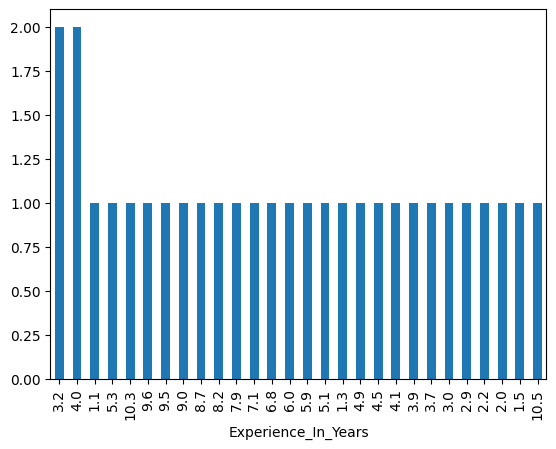

In [196]:
#Bar plot - to identify outliers in categorical data
q2_data['Experience_In_Years'].value_counts().plot.bar() # Except for 2 values all other 'Experience_In_Years' values are unique.
plt.show()

#### Scatter Plot and Correlation Analysis

c:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


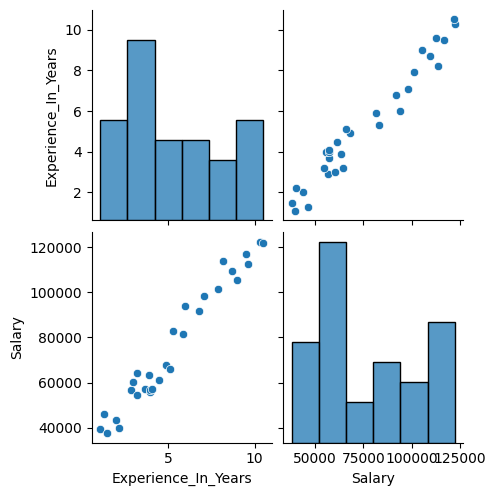

In [197]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(q2_data) # diagonal - histogram, other - scatter plot

In [198]:
q2_data.corr()
# The table shows that there is a "excellent" correlation between both these columns i.e. 0.978242 or 98% (approx.)

,Experience_In_Years,Salary
Experience_In_Years,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='Experience_In_Years', ylabel='Salary'>

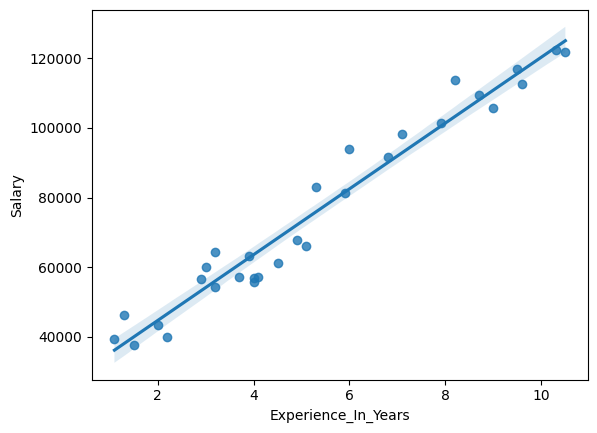

In [199]:
# Visualizing the correlation between x and y i.e., 'Experience_In_Years' and 'Salary'
sns.regplot(x="Experience_In_Years",y="Salary", data = q2_data)
# The visualization also shows that there is a "excellent" correlation between both these columns similar to the matrix shown earlier.


C:\Users\Office\AppData\Local\Temp\ipykernel_11124\535155569.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(q2_data['Experience_In_Years'])


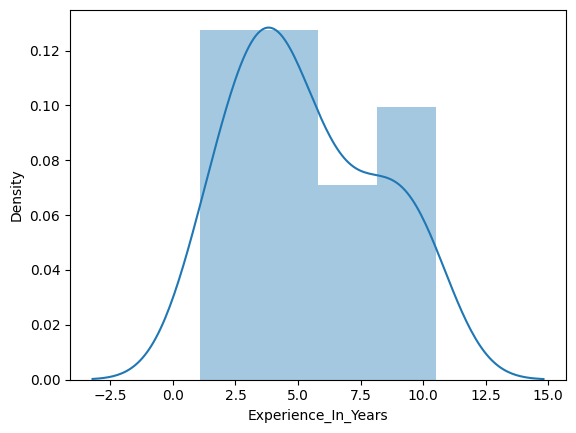

In [200]:
import seaborn as sns
sns.distplot(q2_data['Experience_In_Years'])
plt.show()

C:\Users\Office\AppData\Local\Temp\ipykernel_11124\1123477400.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(q2_data['Salary'])


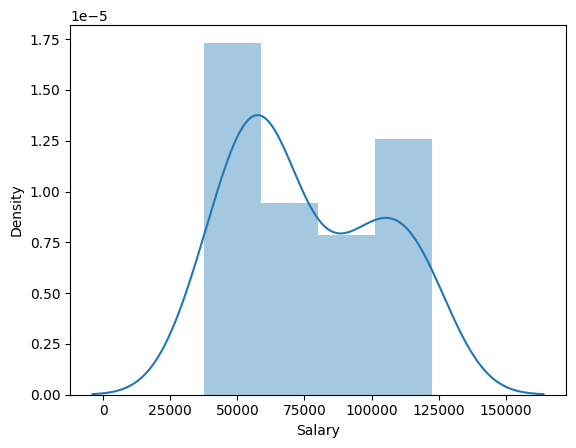

In [201]:
import seaborn as sns
sns.distplot(q2_data['Salary'])
plt.show()

In [202]:
##### Fitting a Linear Regression Model

##### Fitting a Linear Regression Model

In [203]:
# Fitting a Linear Regression Model
import statsmodels.formula.api as smf    # model_Regression model, "Y~X", or "Dependent_Variable ~ Independent_Variable"

model = smf.ols("Salary~Experience_In_Years", data=q2_data).fit()

# Ordinary Least Squares, y Dependent Variable = "Salary", then give ~ symbol and then x Independent variable - "Experience_In_Years" 
# Dataset - q2_data, fit() - the fit function for the regression line

In [204]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        20:55:51   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Experience_In_Years  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
# Coefficient are B0 (as Intercept in params) and B1 (as Experience_In_Years in params)


model.params


# Reg. Equ: Salary = B0 + B1 * Experience_In_Years
# In output: Intercept - B0, Sorting_Time - Coefficient of Experience_In_Years i.e. B1
# Salary = 25792.200199 + 9449.962321 * Experience_In_Years


Intercept              25792.200199
Experience_In_Years     9449.962321
dtype: float64

In [206]:
# Lets suppose Experience_In_Years is 18.5 then predicting the Salary

Salary = 25792.200199 + 9449.962321 * 18.5
Salary

200616.50313750003

In [207]:
# R squared values
(model.rsquared, model.rsquared_adj)
# Since Determination Coefficient i.e., rsquared value is 95.69% rounding off to 96% it is an Excellent equation with - 0.95 < r**2 < 1.0

(0.9569566641435086, 0.9554194021486339)

<Axes: xlabel='Experience_In_Years', ylabel='Salary'>

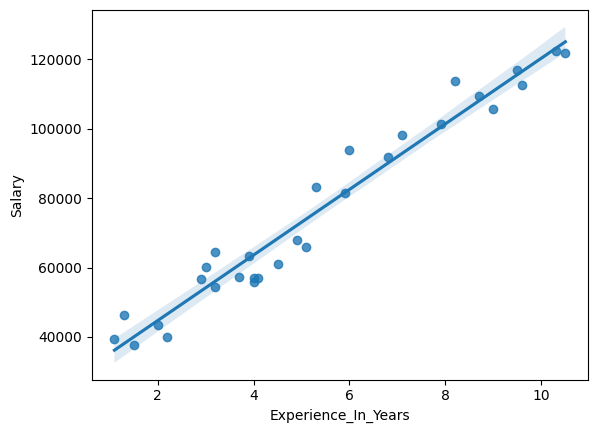

In [208]:
sns.regplot(x="Experience_In_Years",y="Salary", data = q2_data)

In [209]:
# t and p-values
print(model.tvalues,'\n', model.pvalues)

Intercept              11.346940
Experience_In_Years    24.950094
dtype: float64 
 Intercept              5.511950e-12
Experience_In_Years    1.143068e-20
dtype: float64


#### Adding a new Predicted_Salary Column

In [210]:
# Predict for new data
Expdata = q2_data['Experience_In_Years']
Expdata

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: Experience_In_Years, dtype: float64

In [211]:
q2_data['Predicted_Salary'] = model.predict(Expdata) # model-regression model
q2_data

,Experience_In_Years,Salary,Predicted_Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


#### Predict for new data

In [214]:
# Predict for new data
newdata = pd.Series([7,14,21,28])

In [215]:
newdata

0     7
1    14
2    21
3    28
dtype: int64

In [216]:
data_pred = pd.DataFrame(newdata,columns=['Experience_In_Years'])

In [217]:
data_pred

,Experience_In_Years
0,7
1,14
2,21
3,28


In [218]:
model.predict(data_pred) # model-regression model

0     91941.936449
1    158091.672699
2    224241.408949
3    290391.145199
dtype: float64